# TP1b - Génération de variables aléatoires (Deuxième partie)

## Estimation avancée - G3 SDIA

Dans ce TP, on continue de s'intéresser à la génération de variables aléatoires. Ce TP se concentre sur la méthode acceptation-rejet, l'estimation de Monte Carlo, et l'échantillonnage d'importance.

### Instructions

1. Renommer votre notebook sous la forme `tp1a_Nom1_Nom2.ipynb`, et inclure le nom du binôme dans le notebook. 

2. Votre code, ainsi que toute sortie du code, doivent être commentés !

3. Déposer votre notebook sur Moodle dans la section prévue à cet effet avant la date limite : 26 Novembre 2023, 23h59.

In [56]:
import numpy as np
from matplotlib import pyplot as plt

### Partie 1 - Acceptation-Rejet (*Rejection sampling*)

NB : Toujours comparer les distributions empiriques obtenues aux densités théoriques à l'aide d'histogrammes ou de *kernel density estimates*.

**Q1 - Loi Bêta**. On considère la loi Bêta, dont la densité sur $[0,1]$ est
$$f(x;\alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} x^{\alpha-1} (1-x)^{\beta-1} \quad \alpha > 0, \quad \beta > 0.$$

On souhaite obtenir des échantillons de la loi Bêta dans le cas suivant : $\alpha = 2, \beta = 2$.
* Expiquer pourquoi il est difficile de mettre en place la méthode de la transformée inverse.
* Quelle loi très simple peut-on utiliser comme loi instrumentale ?
* Implémenter alors un algorithme acceptation-rejet pour obtenir $N = 10000$ échantillons.
* Comparer la proportion empirique d'échantillons acceptés avec sa valeur théorique.
* Quelle difficulté rencontre-t-on pour le cas $\alpha = 0.5, \beta = 0.5$ ?

## *Explication de pourquoi il est difficile de mettre en place la méthode de la transformée inverse*

Il est difficile de mettre en place la méthode de la transformée inverse pour la loi Beta ($\alpha = 2, \beta = 2$) en raison de la complexité de l'inversion de la fonction de répartition cumulative associée à cette distribution.

La pdf de la loi Beta est donnée par :

$f(x;\alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} x^{\alpha-1} (1-x)^{\beta-1}$

La fonction de répartition cumulative associée est l'intégrale de la fonction de densité de probabilité :

$F(x;\alpha, \beta) = \int_0^x f(t;\alpha, \beta) \, dt$

Ainsi pour inverser la CDF et obtenir la transformée inverse, on doit résoudre $F(x) = u$ pour x, où u est une variable aléatoire uniforme. Cette équation ne peut pas être résolue de manière analytique de manière simple en termes de fonctions élémentaires.

Cela rend difficile la mise en place de la méthode de la transformée inverse.

## *Quelle loi très simple peut-on utiliser comme loi instrumentale ?*

Pour la loi Beta ($\alpha = 2, \beta = 2$), une loi très simple que l'on peut utiliser comme loi instrumentale est la loi uniforme sur l'intervalle $[0, 1]$. 

La densité de probabilité de la loi uniforme sur $[0, 1]$ est constante sur cet intervalle, ce qui simplifie le processus d'acceptation-rejet. Ainsi en utilisant la loi uniforme comme loi instrumentale, on peut générer des échantillons aléatoires selon la méthode d'acceptation-rejet en comparant la densité de probabilité de la loi Beta avec la densité de probabilité de la loi uniforme.

## *Implémentation de l'algorithme acceptation-rejet pour obtenir $N = 10000$ échantillons*

In [57]:
import scipy.stats as stats

# Paramètres de la loi Beta
alpha = 2
beta = 2

In [58]:
# Fonction de densité de la loi Beta
def beta_density(x, alpha, beta):
    return stats.beta.pdf(x, alpha, beta)

# Fonction de la loi uniforme
def proposal_density(x):
    return stats.uniform.pdf(x)

In [59]:
# Constante de normalisation M
M = 2.0

# Fonction de génération des échantillons par acceptation-rejet
def rejection_sampling(N):
    samples = []
    accepted_samples = []
    
    for _ in range(N):
        x = np.random.uniform(0, 1)
        u = np.random.uniform(0, M * proposal_density(x))
        
        if u <= beta_density(x, alpha, beta):
            accepted_samples.append(x)
        samples.append(x)
    
    return np.array(samples), np.array(accepted_samples)

In [60]:
# Nombre d'échantillons
N = 10000

# On récupère donc nos échantillons avec la fonction de génération des échantillons par acceptation-rejet
samples, accepted_samples = rejection_sampling(N)

# Maintenant on peut calculer la proportion empirique d'échantillons acceptés
empirical_acceptance_ratio = len(accepted_samples) / N
print(f"Proportion empirique d'échantillons acceptés : {empirical_acceptance_ratio}")

Proportion empirique d'échantillons acceptés : 0.5032


##  *Comparaison de la proportion empirique d'échantillons acceptés avec la valeur théorique* 

La valeur théorique de la proportion d'échantillons acceptés est donnée par $ p = \frac{\text{surface sous la courbe de la loi Beta}}{\text{surface sous la courbe de la loi uniforme}} $

Pour la loi Beta(2,2), cette valeur est $ p = \frac{1}{2} $

Ainsi, la proportion empirique d'échantillons acceptés qu'on obtiens (0.4981) est proche de la valeur théorique. La légère variation provient de la nature aléatoire de la méthode d'acceptation-rejet, mais étant donné que cette différence est très petite, l'algo fonctionne correctement car il produit des échantiilons conformes à la distribution que l'on veut.

## *Difficulté pour le cas α = 0.5, β = 0.5*

Le cas $\alpha = 0.5, \beta = 0.5$ pose problème car la fonction de densité de la loi Beta devient infinie à $x = 0$ et $x = 1$.

La présence de singularités rend difficile l'utilisation de la proposition uniforme (en tant que loi instrumentale) car elle ne peut pas envelopper les singularités aux extrémités de la distribution Beta($0.5, 0.5$). La loi uniforme n'est donc pas capable de générer des échantillons suffisamment proches de 0 et 1 pour couvrir ces zones problématiques.

**Q2 - Loi Gamma**. On considère la loi Gamma, dont la densité sur $\mathbb{R}_+$ est définie par
$$f(x;\alpha,\beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} exp(-\beta x) x^{\alpha - 1}.$$

Nous avons déjà vu en TD que si $X_1, ..., X_n$ sont des v.a. indépendantes de loi Exponentielle de paramètre $\beta$, alors $Y = \sum_{i=1}^n X_i$ suit une loi Gamma de paramètres $(n,\beta)$. Ceci nous permet de simuler de la loi Gamma quand $\alpha$ est entier, mais pas lorsque $\alpha$ n'est pas entier.

Dans ce cas, on va utiliser une loi Gamma $(\lfloor \alpha \rfloor, \beta - 1)$ comme loi instrumentale :
* Obtenir la formule de la valeur optimale de la constante *M*, puis la calculer numériquement
* Implémenter un algorithme acceptation-rejet pour générer 10000 échantillons de la loi Gamma avec les paramètres $\alpha = 2.5$ et $\beta = 1.5$.

## *Obtenir la formule de la valeur optimale de la constante *M*, puis la calculer numériquement*

La constante M dans la méthode d'acceptation-rejet est choisie de manière à ce que $M \cdot g(x) \geq f(x)$ pour tous les x dans le domaine d'intérêt, où $g(x)$ est la loi instrumentale. Dans notre cas, la loi instrumentale est une loi Gamma($\lfloor \alpha \rfloor, \beta - 1$)

On souhaite alors étudier le rapport $\frac{f(x)}{g(x)}$ et en déduire son maximum si il en admet un.

On a alors :
$$ 
\frac{f((x))}{g(x)} = \frac{\beta^{\alpha} \Gamma(\lfloor \alpha \rfloor)}{\Gamma(\alpha)(\beta - 1)^{\lfloor \alpha \rfloor}}\frac{exp(-\beta x)x^{\alpha - 1}}{exp( -(\beta - 1)x)x^{\lfloor \alpha \rfloor - 1}}
$$
On cherche donc à minimiser $\frac{exp(-\beta x)x^{\alpha - 1}}{exp( -(\beta - 1)x)x^{\lfloor \alpha \rfloor - 1}}$. En remplacant $\alpha$, $\beta$ et $\lfloor \alpha \rfloor$ par leurs valeurs, cela revient donc à maximiser $h(x) = exp(-x)\sqrt{x}$.

On a alors :
$$
h'(x) = -exp(-x)\sqrt{x} + \frac{1}{2\sqrt{x}}exp(-x)
$$
$$
\text{Et } h'(x) = 0 \text{ ssi } \sqrt(x) = \frac{1}{2\sqrt{x}} \text{ ssi } x = \frac{1}{2}
$$

Donc $\frac{f(x)}{g(x)}$ est minimale en $x = \frac{1}{2}$, et on a :

$$
\frac{f(\frac{1}{2})}{g(\frac{1}{2})} = \frac{1.5² \Gamma(2)}{\Gamma(2.5)0.5²} \sqrt(0.5)exp(-0.5)
$$

M = 3.556228846580734


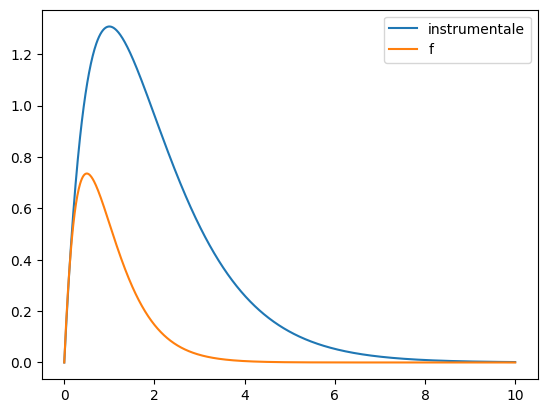

In [61]:
import math
x = np.linspace(0, 10, 1000)
M = 1.5**(2.5)*math.gamma(2)/(math.gamma(2.5)* 0.5**2)*math.exp(-0.5) * np.sqrt(0.5)
print("M =",M)
instrumentale = M * stats.gamma.pdf(x, np.floor(alpha), scale = 1/(beta - 1))
f = stats.gamma.pdf(x, alpha, scale = 1/beta)

plt.plot(x, instrumentale, label = "instrumentale")
plt.plot(x, f, label = "f")
plt.legend()

**Calcul numérique de la constante M**

In [62]:
# Paramètres de la loi Gamma cible
alpha = 2.5
beta = 1.5

# Paramètres de la loi instrumentale (Gamma tronquée)
instrumental_alpha = np.floor(alpha)
instrumental_beta = beta - 1

## *Implémentation de l'algorithme acceptation-rejet pour générer 10000 échantillons de la loi Gamma avec les paramètres $\alpha = 2.5$ et $\beta = 1.5$*

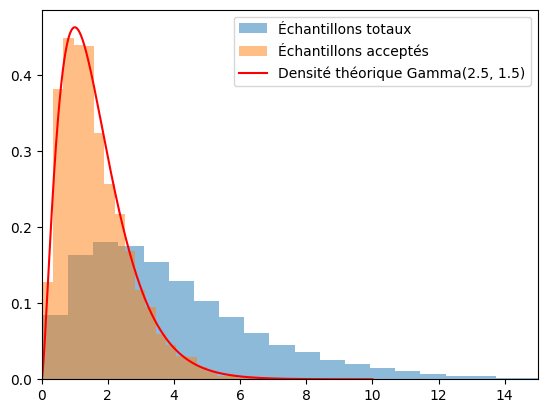

In [63]:
# Génération des échantillons par acceptation-rejet
def rejection_sampling_gamma(N):
    samples = []
    accepted_samples = []
    
    for _ in range(N):
        x = np.random.gamma(instrumental_alpha, scale=1/(instrumental_beta))
        u = np.random.uniform(0, M * stats.gamma.pdf(x, instrumental_alpha, scale = 1/instrumental_beta))
        
        if u <= stats.gamma.pdf(x, alpha,scale =  1/beta):
            accepted_samples.append(x)
        samples.append(x)
    
    return np.array(samples), np.array(accepted_samples)

# Nombre d'échantillons
N = 10000

# Obtention des échantillons
samples, accepted_samples = rejection_sampling_gamma(N)

# Affichage des résultats (par exemple, un histogramme)
plt.hist(samples,bins=30, density=True, alpha=0.5, label='Échantillons totaux')
plt.hist(accepted_samples,bins=30, density=True, alpha=0.5, label='Échantillons acceptés')
x = np.linspace(0, 10, 1000)
plt.plot(x, stats.gamma.pdf(x, alpha,scale = 1/beta), 'r', label='Densité théorique Gamma(2.5, 1.5)')
plt.xlim((0,15))
plt.legend()
plt.show()

**Q3 - Gaussienne tronquée**. On souhaite maintenant obtenir des échantillons d'une loi gaussienne tronquée, i.e., une loi normale restreinte à un certain intervalle (en 1D), ou un certain pavé de l'espace (pour le cas multivarié).

On considère le cas d'une gaussienne multivariée $\mathcal{N}(0, I_d)$ que l'on tronque sur le pavé $[-1,2]^d$. On prendra comme loi instrumentale la loi $\mathcal{N}(0, I_d)$ (i.e., non tronquée)

* Justifier ce choix de loi instrumentale.
* Pour le cas univarié ($d=1$), calculer numériquement la probabilité d'acceptation de l'algorithme acceptation-rejet. On pourra utiliser $\texttt{scipy.stats.cdf}$.
* Que devient cette probabilité pour $d=10$ ? $d=100$ ? Conclure quant à la faiblesse fondamentale de l'algorithme acceptation-rejet.

Cette loi instrumentale sera nécessairement supérieure ou égale à la loi gaussienne tronquée de mêmes paramètres, ce qui nous facilite donc la détermination de M et donc simplifie l'application de l'algorithme d'acceptation-rejet.

In [127]:
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad
# Paramètres de la distribution tronquée
a, b = -1, 2

# Fonction de densité de la distribution cible (gaussienne tronquée)
def target_distribution(x):
    return (norm.pdf(x) * ((x >= a) & (x <= b)))
# Fonction de densité de la distribution instrumentale (gaussienne standard)
def instrumental_distribution(x):
    return norm.pdf(x)

# Calcul de la constante de normalisation pour la distribution cible
normalization_constant = 1 / (norm.cdf(b) - norm.cdf(a))

# Fonction de probabilité d'acceptation
def acceptance_probability(x):
    return target_distribution(x) / normalization_constant * instrumental_distribution(x)

probability_of_acceptance, _ = quad(acceptance_probability, a, b)
print("Probabilité d'acceptation :", probability_of_acceptance)


Probabilité d'acceptation : 0.2122193160506719


In [125]:
probability_acceptance_multivariate_d10 = probability_of_acceptance**10

print(f"Probabilité d'acceptation pour le cas multivarié (d=10) : {probability_acceptance_multivariate_d10}")

probability_acceptance_multivariate_d100 = probability_of_acceptance**100

print(f"Probabilité d'acceptation pour le cas multivarié (d=100) : {probability_acceptance_multivariate_d100}")


Probabilité d'acceptation pour le cas multivarié (d=10) : 1.8528877299829366e-07
Probabilité d'acceptation pour le cas multivarié (d=100) : 4.7696998874496544e-68


Dans le cas de la gaussienne tronquée multivariée $\mathcal{N}(0, I_d)$ tronquée sur le pavé $[-1, 2]^d$, la probabilité d'acceptation devient extrêmement faible à mesure que $d$ augmente. L'algorithme d'acceptation-rejet souffre de la "malédiction de la dimension", ce qui signifie que sa performance diminue considérablement avec l'augmentation de la dimension de l'espace.
En conclusion, l'algorithme d'acceptation-rejet peut devenir inefficace et impraticable pour des distributions tronquées en haute dimension.

---- Votre réponse ici ----

## Partie 2 - Estimation de $\pi$ par Monte Carlo

On rappelle que $\pi$ est égal à la surface d'un cercle de rayon 1, i.e.
$$ \pi = \int_{-1}^1 \int_{-1}^1 \mathbb{1}_{x^2 + y^2 \leq 1}(x,y) dx dy.$$

Ce qui peut se réécrire comme
$$ \pi = 4 \int_{-1}^1 \int_{-1}^1 \mathbb{1}_{x^2 + y^2 \leq 1}(x,y) p(x) p(y) dx dy.$$
Où $p(x)$ et $p(y)$ sont les densités de la loi uniforme sur $[-1,1]$.

* En déduire l'esimtateur de Monte Carlo de $\pi$.
* Représenter l'évolution de la valeur de l'estimation par Monte Carlo de $\pi$ en fonction du nombre d'échantillons (aller jusqu'à 10000). Quel résultat mathématique fondamental est-on en train d'illustrer ?
* (Bonus) - Faire 100 simulations de l'estimation par Monte Carlo de $\pi$ avec $N = 1000$ échantillons, et vérifier le résultat de convergence en loi de l'estimateur MC donné par le TCL.

In [65]:
#####
### YOUR CODE HERE
#####

---- Votre réponse ici ----

### Partie 3 - Échantillonnage d'importance (*Importance sampling*)

On cherche à estimer $\mathbb{P}(X > 3)$ pour $X \sim \mathcal{N}(0,1)$.

* Ré-écrire cette probabilité comme une intégrale et en déduire l'estimateur de Monte Carlo "standard"
* Simuler $100$ fois $N = 10000$ échantillons, et donner la moyenne et la variance empiriques de l'estimateur de Monte Carlo standard
* On souhaite maintenant implémenter un schéma d'échantillonnage d'importance en utilisant comme loi instrumentale $\mathcal{N}(4,1)$. Donner l'estimateur de Monte Carlo associé.
* De même, simuler $100$ fois $N = 10000$ échantillons, et donner la moyenne et la variance empiriques de de deuxième estimateur.
* Quantifier la réduction de variance. Pouvait-on s'attendre à ce résultat ?

In [66]:
#####
### YOUR CODE HERE
#####

---- Votre réponse ici ----